In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# Importing the Data

In [265]:
df = pd.read_csv('ARTradeData.csv')
#df = pd.read_csv('Trading Summary FY2019.csv', thousands=',')
df.head()

,buy #,Symbol,b/s,buy date,purchase price,purchase qty,COGS,sell #,Symbol.1,b/s.1,...,sell price,sell qty,Revenue,fee,net sale,gain/loss $,gain/loss %,days held,G/L,Week
0,96,AVGO,B,1/2/2019,252.9699,-10,-2529.699,284.0,AVGO,S,...,253.2210,10.0,2532.210,0.05,2532.160,2.511,0.099%,0.0,G,1.0
1,18,BND,B,1/2/2019,79.2750,-20,-1585.500,278.0,BND,S,...,79.3000,20.0,1586.000,0.04,1585.960,0.500,0.032%,0.0,G,1.0
2,158,BND,B,1/2/2019,79.3599,-20,-1587.198,59.0,BND,S,...,79.6100,20.0,1592.200,0.04,1592.160,5.002,0.315%,1.0,G,1.0
3,154,BSV,B,1/2/2019,78.6192,-20,-1572.384,60.0,BSV,S,...,78.7702,20.0,1575.404,0.04,1575.364,3.020,0.192%,1.0,G,1.0
4,12,CME,B,1/2/2019,187.3479,-20,-3746.958,196.0,CME,S,...,187.3800,20.0,3747.600,0.06,3747.540,0.642,0.017%,0.0,G,1.0


# First Look

In [266]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 21 columns):
buy #             1685 non-null object
Symbol            1692 non-null object
b/s               1692 non-null object
buy date          1692 non-null object
purchase price    1692 non-null object
purchase qty      1692 non-null int64
COGS              1692 non-null float64
sell #            1685 non-null float64
Symbol.1          1685 non-null object
b/s.1             1685 non-null object
sell date         1689 non-null object
sell price        1689 non-null object
sell qty          1689 non-null float64
Revenue           1689 non-null float64
fee               1685 non-null float64
net sale          1689 non-null float64
gain/loss $       1689 non-null float64
gain/loss %       1689 non-null object
days held         1689 non-null float64
G/L               1689 non-null object
Week              1689 non-null float64
dtypes: float64(9), int64(1), object(11)
memory usage: 277.7+ KB


In [267]:
# Column names
df.columns

Index(['buy #', 'Symbol', 'b/s', 'buy date', 'purchase price', 'purchase qty',
       'COGS', 'sell #', 'Symbol.1', 'b/s.1', 'sell date', 'sell price',
       'sell qty', 'Revenue', 'fee', 'net sale', 'gain/loss $', 'gain/loss %',
       'days held', 'G/L', 'Week'],
      dtype='object')

In [268]:
# Number of missing values per column
df.isnull().sum().sort_values(ascending=False).head(20)

buy #             7
sell #            7
Symbol.1          7
b/s.1             7
fee               7
sell qty          3
G/L               3
sell price        3
Week              3
Revenue           3
net sale          3
gain/loss $       3
gain/loss %       3
days held         3
sell date         3
COGS              0
purchase qty      0
purchase price    0
buy date          0
b/s               0
dtype: int64

In [269]:
# Total number of rows with at least one missing value
sum(df.isnull().values.ravel())

65

In [270]:
df['purchase qty'].describe()

count    1692.000000
mean       36.869976
std        57.114322
min      -500.000000
25%        15.000000
50%        30.000000
75%        50.000000
max       800.000000
Name: purchase qty, dtype: float64

In [271]:
df.dtypes

buy #              object
Symbol             object
b/s                object
buy date           object
purchase price     object
purchase qty        int64
COGS              float64
sell #            float64
Symbol.1           object
b/s.1              object
sell date          object
sell price         object
sell qty          float64
Revenue           float64
fee               float64
net sale          float64
gain/loss $       float64
gain/loss %        object
days held         float64
G/L                object
Week              float64
dtype: object

# Preprocessing the Data

In [272]:
# Eliminating rows with missing data
df = df.dropna()
df.shape

(1678, 21)

In [258]:
# Stripping all unwanted symbols
# df = df.replace({',':''}, regex=True)
# df.head()

,buy #,Symbol,b/s,buy date,purchase price,purchase qty,COGS,sell #,Symbol.1,b/s.1,...,sell price,sell qty,Revenue,fee,net sale,gain/loss $,gain/loss %,days held,G/L,Week
0,35,NBEV,B,1/3/2019,$5.61,-500,$2803.95,119.0,NBEV,S,...,$5.63,500.0,$2815.00,0.1,$2814.90,$11.05,0.39%,1.0,G,1.0
1,116,PEGI,B,1/2/2019,$18.73,-300,$5618.82,346.0,PEGI,S,...,$18.75,300.0,$5625.00,0.12,$5624.88,$6.18,0.11%,0.0,G,1.0
2,112,DUST,B,1/2/2019,$23.17,-200,$4634.00,296.0,DUST,S,...,$23.37,200.0,$4674.00,0.09,$4673.91,$40.00,0.86%,0.0,G,1.0
3,142,SLV,B,1/2/2019,$14.55,-200,$2909.96,40.0,SLV,S,...,$14.67,200.0,$2934.00,0.06,$2933.94,$24.04,0.83%,1.0,G,1.0
4,26,TZA,B,1/3/2019,$15.39,-200,$3077.00,66.0,TZA,S,...,$15.44,200.0,$3088.20,0.07,$3088.13,$11.20,0.36%,0.0,G,1.0


In [259]:
# df['COGS'] = df['COGS'].apply(pd.to_numeric, errors='ignore')
# df['COGS'].head()

0    $2803.95
1    $5618.82
2    $4634.00
3    $2909.96
4    $3077.00
Name: COGS, dtype: object

In [260]:
# df['COGS'] = df['COGS'].map(lambda x: x.lstrip('+-').lstrip('$'))
# df['COGS'].head()

0    2803.95
1    5618.82
2    4634.00
3    2909.96
4    3077.00
Name: COGS, dtype: object

In [262]:
# df['COGS'] = df['COGS'].apply(pd.to_numeric, errors='ignore')
# df['COGS'].head()

0    2803.95
1    5618.82
2       4634
3    2909.96
4       3077
Name: COGS, dtype: object

In [218]:
#Converting everything that should be integers to integer types
# cols = df.columns.drop(['Symbol','buy date','Symbol.1','b/s.1','sell date','gain/loss %'])
# df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
# df.dtypes

buy #             float64
Symbol             object
b/s               float64
buy date           object
purchase price    float64
purchase qty        int64
COGS              float64
sell #            float64
Symbol.1           object
b/s.1              object
sell date          object
sell price        float64
sell qty          float64
 Revenue          float64
fee               float64
net sale          float64
gain/loss $       float64
gain/loss %        object
days held         float64
G/L               float64
Week              float64
dtype: object

In [273]:
df.head()

,buy #,Symbol,b/s,buy date,purchase price,purchase qty,COGS,sell #,Symbol.1,b/s.1,...,sell price,sell qty,Revenue,fee,net sale,gain/loss $,gain/loss %,days held,G/L,Week
0,96,AVGO,B,1/2/2019,252.9699,-10,-2529.699,284.0,AVGO,S,...,253.2210,10.0,2532.210,0.05,2532.160,2.511,0.099%,0.0,G,1.0
1,18,BND,B,1/2/2019,79.2750,-20,-1585.500,278.0,BND,S,...,79.3000,20.0,1586.000,0.04,1585.960,0.500,0.032%,0.0,G,1.0
2,158,BND,B,1/2/2019,79.3599,-20,-1587.198,59.0,BND,S,...,79.6100,20.0,1592.200,0.04,1592.160,5.002,0.315%,1.0,G,1.0
3,154,BSV,B,1/2/2019,78.6192,-20,-1572.384,60.0,BSV,S,...,78.7702,20.0,1575.404,0.04,1575.364,3.020,0.192%,1.0,G,1.0
4,12,CME,B,1/2/2019,187.3479,-20,-3746.958,196.0,CME,S,...,187.3800,20.0,3747.600,0.06,3747.540,0.642,0.017%,0.0,G,1.0


In [278]:
# The purchase qty feature contains negative numbers. These should be made positive. 
df['purchase qty'] = df['purchase qty'].abs()
#df['COGS'] = df['COGS'].map(lambda x: x.lstrip('+-').lstrip('$'))
#df['COGS'] = df['COGS'].astype(str).astype(float)
df['COGS'] = df['COGS'].abs()
df.head()

,buy #,Symbol,b/s,buy date,purchase price,purchase qty,COGS,sell #,Symbol.1,b/s.1,...,sell price,sell qty,Revenue,fee,net sale,gain/loss $,gain/loss %,days held,G/L,Week
0,96,AVGO,B,1/2/2019,252.9699,10,2529.699,284.0,AVGO,S,...,253.2210,10.0,2532.210,0.05,2532.160,2.511,0.099%,0.0,1,1.0
1,18,BND,B,1/2/2019,79.2750,20,1585.500,278.0,BND,S,...,79.3000,20.0,1586.000,0.04,1585.960,0.500,0.032%,0.0,1,1.0
2,158,BND,B,1/2/2019,79.3599,20,1587.198,59.0,BND,S,...,79.6100,20.0,1592.200,0.04,1592.160,5.002,0.315%,1.0,1,1.0
3,154,BSV,B,1/2/2019,78.6192,20,1572.384,60.0,BSV,S,...,78.7702,20.0,1575.404,0.04,1575.364,3.020,0.192%,1.0,1,1.0
4,12,CME,B,1/2/2019,187.3479,20,3746.958,196.0,CME,S,...,187.3800,20.0,3747.600,0.06,3747.540,0.642,0.017%,0.0,1,1.0


In [280]:
# Convert the G's and L's to 1's and 0's
df['G/L'] = df['G/L'].replace("G",1)
df['G/L'] = df['G/L'].replace("L",0)
df['G/L'].value_counts()

1    1066
0     612
Name: G/L, dtype: int64

In [289]:
df['buy date'].dtypes

dtype('<M8[ns]')

In [290]:
#Convert date objects to datetime data
df['buy date'] = pd.to_datetime(df['buy date'])
df['sell date'] = pd.to_datetime(df['sell date'])

In [281]:
# Creating lists of purchase qyt and gain/loss data and checking they are the same length
a = np.array(df['purchase qty'].tolist())
b = np.array(df['gain/loss $'].tolist())
print(a)
print(b)
print(len(a))
print(len(b))

[ 10  20  20 ... 100   1  74]
[  2.511   0.5     5.002 ... 122.63    0.55   40.7  ]
1678
1678


In [282]:
print(df['purchase qty'].describe())
      
print(df['gain/loss $'].describe())

count    1678.000000
mean       43.977354
std        51.505372
min         1.000000
25%        20.000000
50%        30.000000
75%        50.000000
max       800.000000
Name: purchase qty, dtype: float64
count    1678.000000
mean        0.232937
std        37.808149
min      -499.495000
25%        -4.528000
50%         1.000000
75%         8.577500
max       425.000000
Name: gain/loss $, dtype: float64


# Statistical Analysis

### Pandas Profiling

In [310]:
# Pandas Profiling
import pandas_profiling as prof
prof.ProfileReport(df)

Number of variables,22
Number of observations,1678
Total Missing (%),0.0%
Total size in memory,288.5 KiB
Average record size in memory,176.0 B
Numeric,7
Categorical,6
Boolean,1
Date,2
Text (Unique),0
Rejected,6


### Cufflinks Interactive Visualizations

In [313]:
# Cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [315]:
# The plot is blank for df and a single feature. Research more at...
# https://github.com/santosjorge/cufflinks/blob/master/Cufflinks%20Tutorial%20-%20Pandas%20Like.ipynb
df['COGS'].iplot()

In [312]:
# Exporting the profile to html file
profile = prof.ProfileReport(df)
profile.to_file(outputfile="AR Day Trading Data Profile.html")

### Normality Tests

In [59]:
# Checking to make sure data is normally distributed before attempting correlation assessment
from scipy import stats
from scipy.stats import normaltest

x = np.concatenate((a,b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha: #null hypothesis: x comes from a normal distribution
    print("The null hypotheis can be rejected. The distribution is not normal.")
else:
    print("The null hypotheis cannot be rejected. The distribution is normal.")

p = 0
The null hypotheis can be rejected. The distribution is not normal.


In [60]:
# Checking to make sure data is normally distributed before attempting correlation assessment
from scipy import stats
from scipy.stats import normaltest

k2, p = stats.normaltest(a)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha: #null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected. The distribution is not normal.")
else:
    print("The null hypothesis cannot be rejected. The distribution is normal.")

p = 0
The null hypothesis can be rejected. The distribution is not normal.


In [61]:
stats.normaltest(a)

NormaltestResult(statistic=1815.7171257530208, pvalue=0.0)

([array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.44e+03, 2.26e+02,
         5.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 1.00e+00]),
  array([3.000e+00, 2.000e+00, 8.000e+00, 1.190e+02, 1.532e+03, 1.200e+01,
         1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])],
 array([-499.495     , -381.35909091, -263.22318182, -145.08727273,
         -26.95136364,   91.18454545,  209.32045455,  327.45636364,
         445.59227273,  563.72818182,  681.86409091,  800.        ]),
 <a list of 2 Lists of Patches objects>)

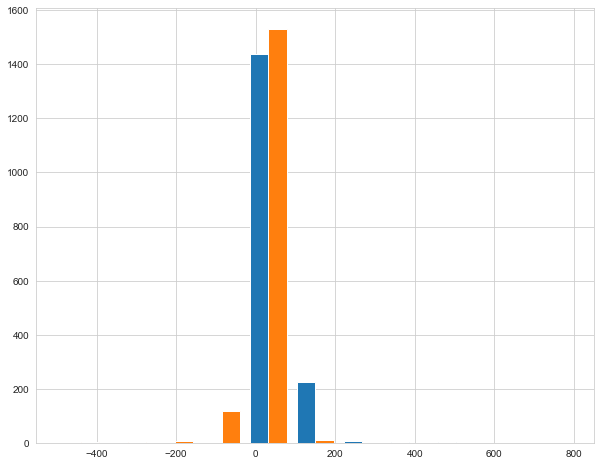

In [62]:
plt.hist([a,b], bins=11, label=['a', 'b'])

In [64]:
# Pearson's Correlation for purchase quantity and gain/loss using scipy
from scipy.stats.stats import pearsonr

print(pearsonr(a,b))

(0.05190730449104972, 0.033490901111952284)


In [68]:
# Pearson's Correlation for same using numpy
print(np.corrcoef(a,b))

[[1.        0.0519073]
 [0.0519073 1.       ]]


In [24]:
# Setting some visualization parameters
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')

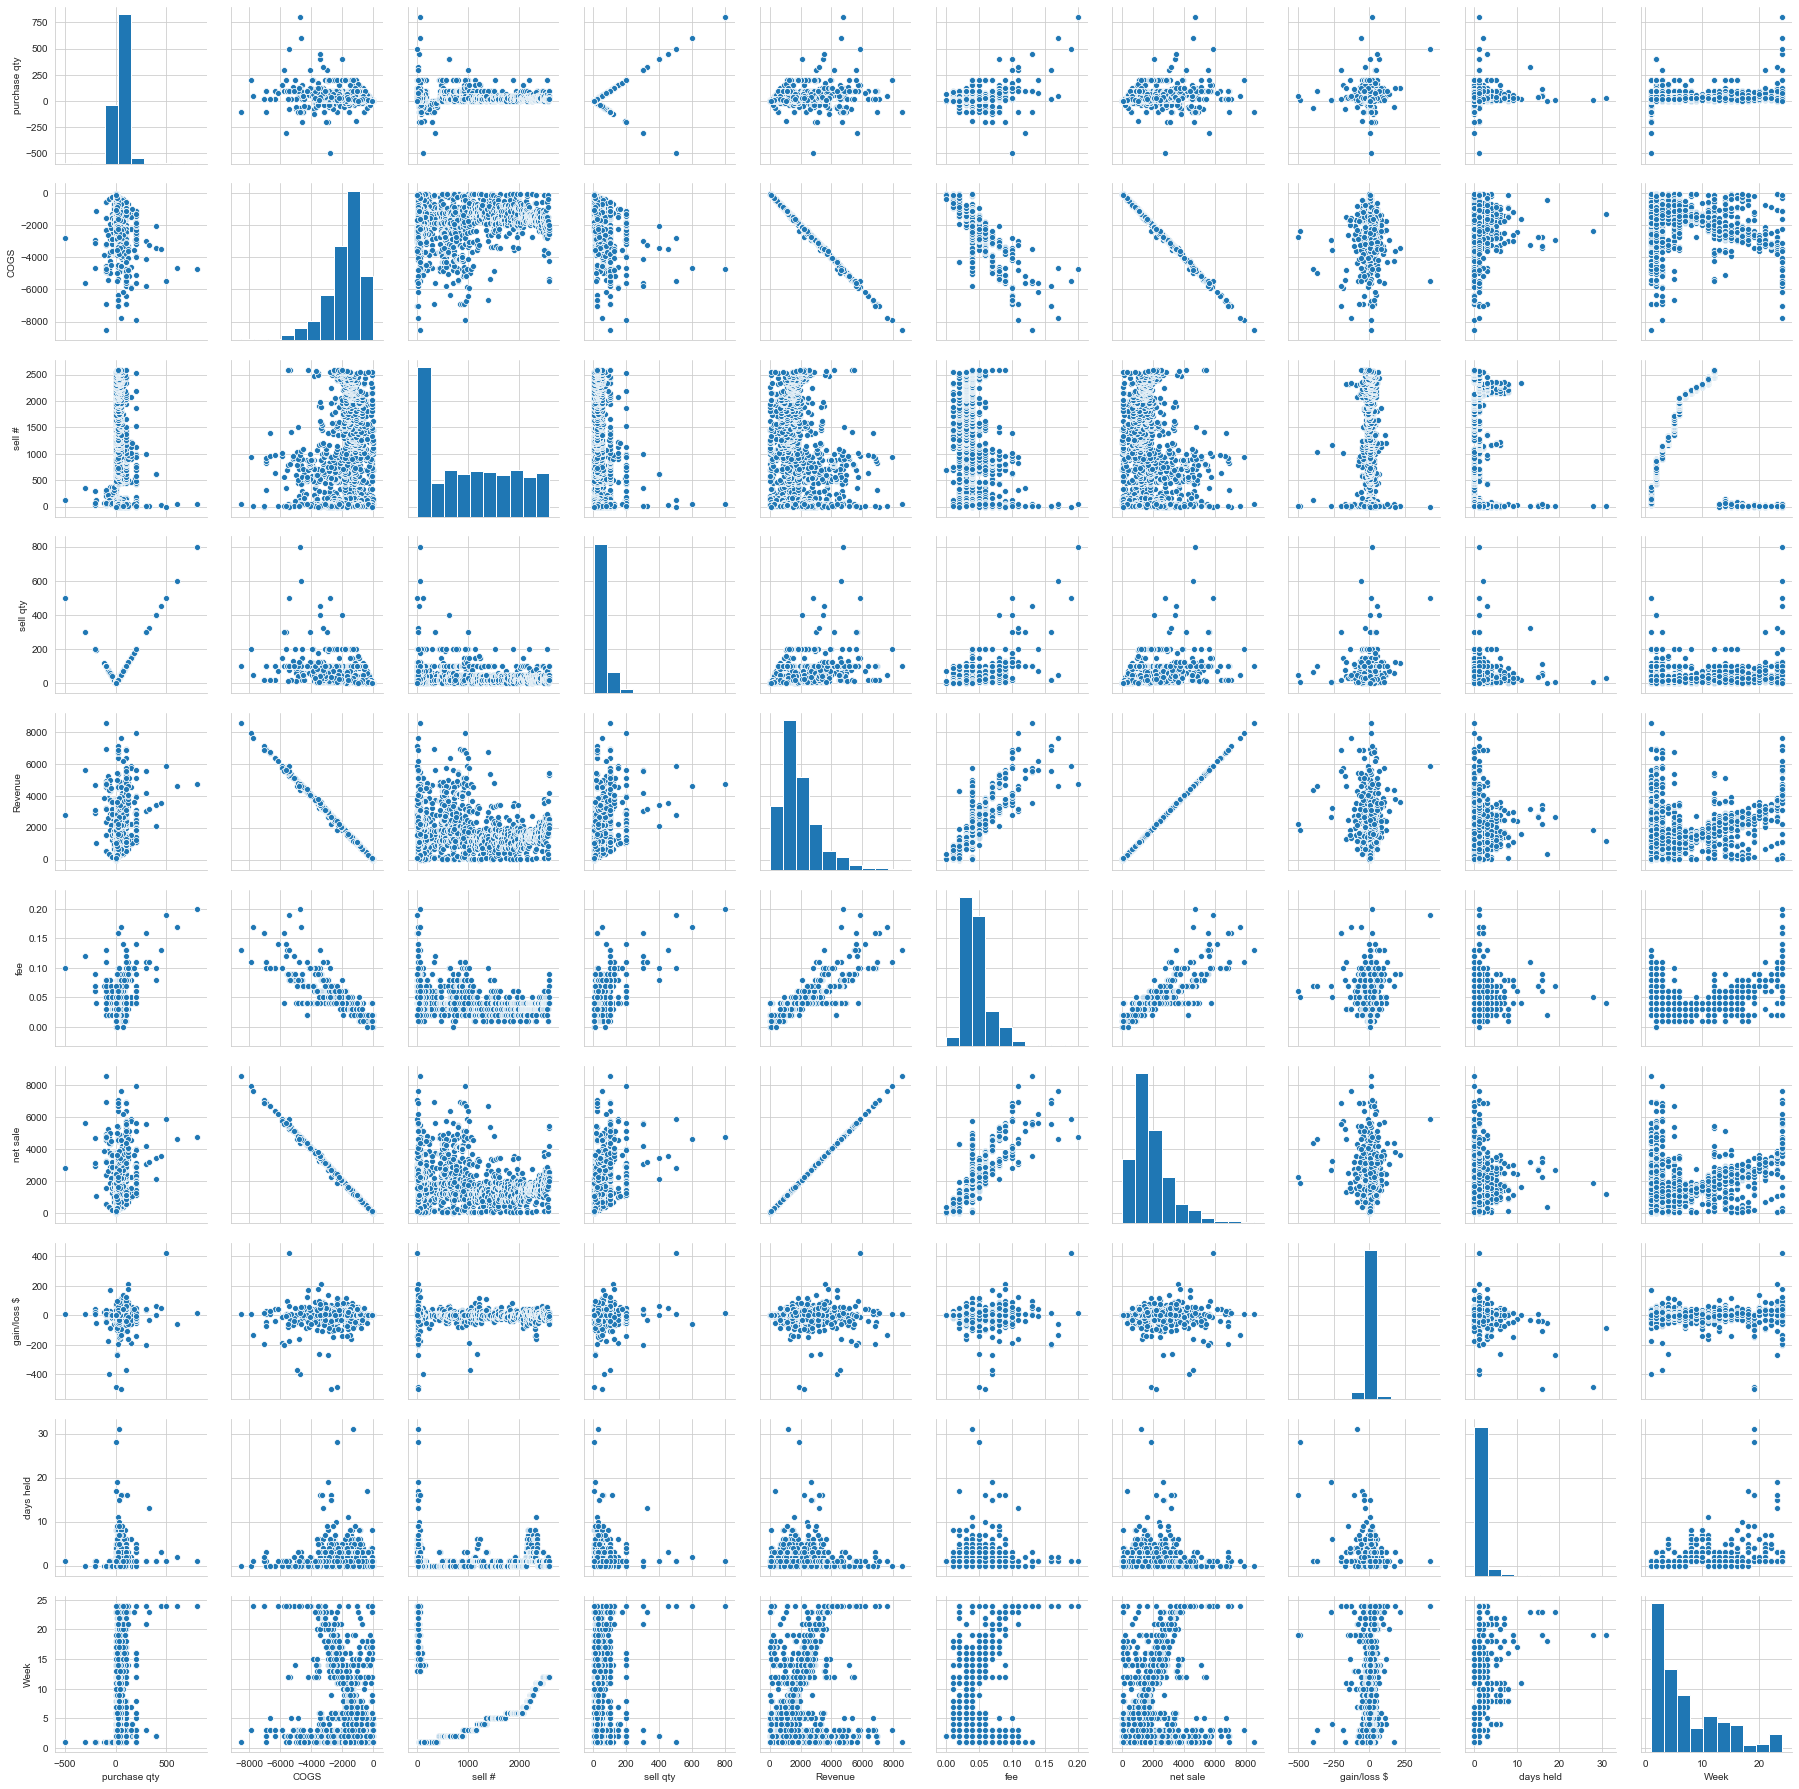

In [21]:
sns.pairplot(df)

In [22]:
X = df[['purchase qty','gain/loss $']]

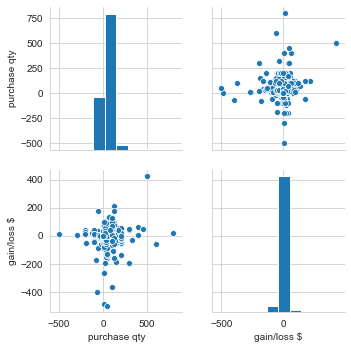

In [66]:
sns.pairplot(X)

Text(0.5, 1.0, 'Gains vs Losses per Week')

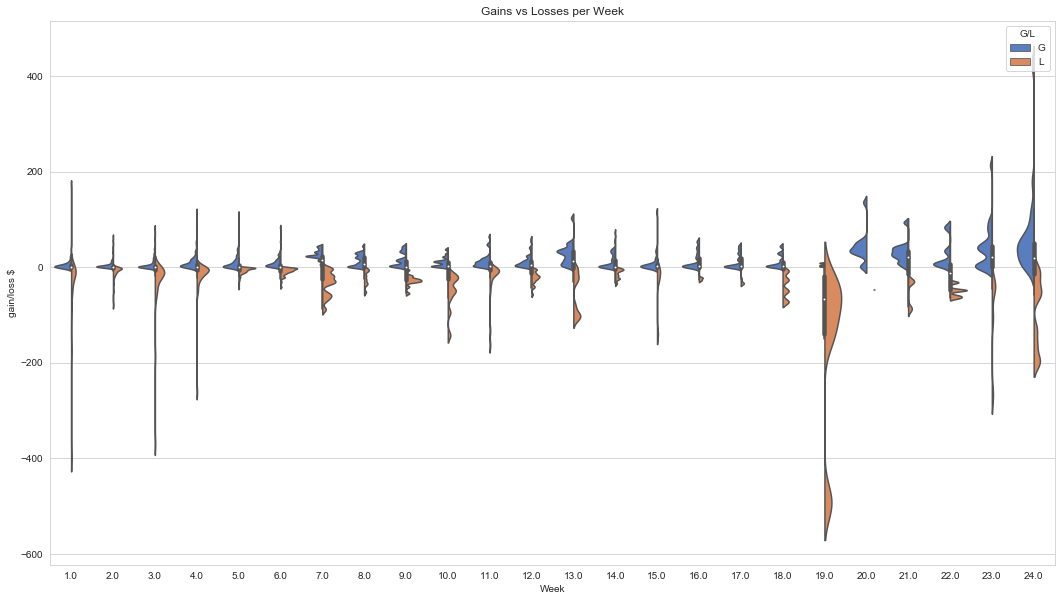

In [109]:
from matplotlib import pyplot

size = (18, 10)
fig, ax = pyplot.subplots(figsize=size)
sns.violinplot(ax=ax, 
               x="Week", 
               y="gain/loss $", 
               hue="G/L", 
               data=df, 
               palette="muted", 
               split=True, 
               scale="count", 
               bw=.2).set_title("Gains vs Losses per Week")

In [99]:
df_weeks = df.groupby(['Week']).mean()
df_weeks.head(30)

,purchase qty,COGS,sell #,sell qty,Revenue,fee,net sale,gain/loss $,days held
Week,,,,,,,,,
1.0,51.891026,-2165.942929,174.814103,51.891026,2163.509481,0.044615,2163.464865,-2.433436,0.102564
2.0,54.709220,-2228.672521,647.925532,54.709220,2228.987525,0.043085,2228.944440,0.315018,0.131206
3.0,50.609375,-1933.689859,1026.148438,50.609375,1928.112602,0.040781,1928.071820,-5.577219,0.414062
4.0,28.490909,-1105.171327,1248.790909,28.490909,1105.649982,0.029455,1105.620527,0.478691,1.036364
5.0,27.512195,-1385.247434,1536.814634,27.512195,1386.678693,0.033024,1386.645668,1.431263,0.234146
6.0,28.695652,-1276.249924,1905.336957,28.695652,1276.375266,0.031033,1276.344234,0.125348,0.211957
7.0,39.264706,-1243.574294,2106.647059,39.264706,1243.362324,0.029412,1243.332912,-0.211971,0.970588
8.0,34.305556,-1229.658028,2177.916667,34.305556,1236.227306,0.029722,1236.197583,6.569278,3.527778
9.0,28.370370,-1522.689630,2242.148148,28.370370,1517.821333,0.034444,1517.786889,-4.868333,2.185185


In [97]:
df['Week'].value_counts(sort=False)

1.0     156
2.0     282
3.0     128
4.0     110
5.0     205
6.0     184
7.0      34
8.0      36
9.0      27
10.0     29
11.0     67
12.0     71
13.0     34
14.0     82
15.0     39
16.0     32
19.0     13
18.0     15
17.0     32
20.0     14
21.0     19
23.0     30
22.0     10
24.0     29
Name: Week, dtype: int64

In [106]:
df_weeks_sum = df.groupby(['Week']).sum()
df_weeks_sum.head(30)

,purchase qty,COGS,sell #,sell qty,Revenue,fee,net sale,gain/loss $,days held
Week,,,,,,,,,
1.0,8095,-337887.097,27271.0,8095.0,337507.479,6.96,337500.519,-379.616,16.0
2.0,15428,-628485.651,182715.0,15428.0,628574.482,12.15,628562.332,88.835,37.0
3.0,6478,-247512.302,131347.0,6478.0,246798.413,5.22,246793.193,-713.884,53.0
4.0,3134,-121568.846,137367.0,3134.0,121621.498,3.24,121618.258,52.656,114.0
5.0,5640,-283975.724,315047.0,5640.0,284269.132,6.77,284262.362,293.409,48.0
6.0,5280,-234829.986,350582.0,5280.0,234853.049,5.71,234847.339,23.064,39.0
7.0,1335,-42281.526,71626.0,1335.0,42274.319,1.00,42273.319,-7.207,33.0
8.0,1235,-44267.689,78405.0,1235.0,44504.183,1.07,44503.113,236.494,127.0
9.0,766,-41112.620,60538.0,766.0,40981.176,0.93,40980.246,-131.445,59.0


In [107]:
df_weeks_sum['gain/loss $'].describe()

count      24.000000
mean       16.286208
std       454.042828
min     -1617.613000
25%       -41.564000
50%        97.724500
75%       242.118750
max       514.115000
Name: gain/loss $, dtype: float64

In [101]:
df_weeks.columns

Index(['purchase qty', 'COGS', 'sell #', 'sell qty', 'Revenue', 'fee',
       'net sale', 'gain/loss $', 'days held'],
      dtype='object')

## Routine Metrics

- Win rate
- Loss rate
- Average win
- Average loss
- Total number of trades
- Number of winning trades
- Number of losing trades
- Profit factor
- Statistical Expectancy (average profitability per trade)
- Expectation (mathematical outcome)

In [162]:
# Aggretating all metrics functions under one function
def metrics():
    win_rate()

In [163]:
metrics()

WIN/LOSS RATES
7 Day: 57%
30 Day: 67%
60 Day: 77%
90 Day: 73%
180 Day: 75%
Total: 64%


In [321]:
# Create a function to calculate the win rates over time
def win_rate():
    df_win = df[['sell date', 'gain/loss $']]
    df_win = df_win.groupby('sell date').sum()
    total = []
    for val in df_win['gain/loss $']:
        if val > 0:
            total.append(1)
        else:
            total.append(0)
    #total = df['G/L'].tolist()
    print("WIN/LOSS RATES")
    print("7 Day: {0:.00%}".format(np.mean(total[-7:])))
    print("30 Day: {0:.00%}".format(np.mean(total[-30:])))
    print("60 Day: {0:.00%}".format(np.mean(total[-60:])))
    print("90 Day: {0:.00%}".format(np.mean(total[-90:])))
    print("180 Day: {0:.00%}".format(np.mean(total[-180:])))
    print("Total: {0:.00%}".format(np.mean(total)))

In [334]:
win_rate()

WIN/LOSS RATES
7 Day: 71%
30 Day: 77%
60 Day: 78%
90 Day: 72%
180 Day: 67%
Total: 67%


In [ ]:
#Andi asks for cumulative daily win rates as well as the ratio of average loss to average gain per
# calendar month and total & tha ratio of total dollars gained in a day to total dollars lost

In [283]:
df.head()

,buy #,Symbol,b/s,buy date,purchase price,purchase qty,COGS,sell #,Symbol.1,b/s.1,...,sell price,sell qty,Revenue,fee,net sale,gain/loss $,gain/loss %,days held,G/L,Week
0,96,AVGO,B,1/2/2019,252.9699,10,2529.699,284.0,AVGO,S,...,253.2210,10.0,2532.210,0.05,2532.160,2.511,0.099%,0.0,1,1.0
1,18,BND,B,1/2/2019,79.2750,20,1585.500,278.0,BND,S,...,79.3000,20.0,1586.000,0.04,1585.960,0.500,0.032%,0.0,1,1.0
2,158,BND,B,1/2/2019,79.3599,20,1587.198,59.0,BND,S,...,79.6100,20.0,1592.200,0.04,1592.160,5.002,0.315%,1.0,1,1.0
3,154,BSV,B,1/2/2019,78.6192,20,1572.384,60.0,BSV,S,...,78.7702,20.0,1575.404,0.04,1575.364,3.020,0.192%,1.0,1,1.0
4,12,CME,B,1/2/2019,187.3479,20,3746.958,196.0,CME,S,...,187.3800,20.0,3747.600,0.06,3747.540,0.642,0.017%,0.0,1,1.0


In [318]:
#group by sell dates
#sum the gain/loss
#calculate means
df2 = df.groupby(df['sell date']).mean()

In [ ]:
def avg_win():
    

In [ ]:
def avg_loss():
    